In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data=pd.read_csv("loan_data.csv")

In [3]:
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
data.tail()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1
44999,24.0,male,High School,51609.0,1,RENT,6665.0,DEBTCONSOLIDATION,17.05,0.13,3.0,628,No,1


In [5]:
data.shape

(45000, 14)

In [6]:
print("Number of Rows:",data.shape[0])
print("Number of Columns:",data.shape[1])

Number of Rows: 45000
Number of Columns: 14


In [7]:
data.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [10]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


C:\Users\lingas\AppData\Local\Temp\ipykernel_7776\2021420449.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=data, palette='coolwarm')


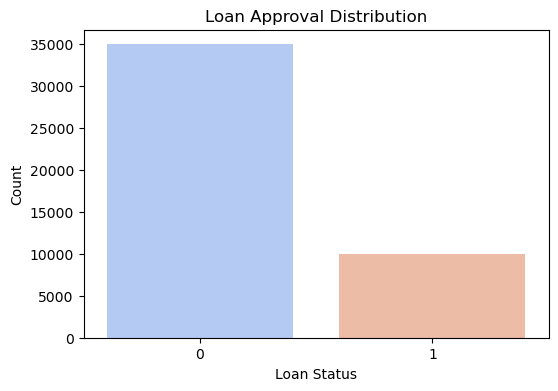

In [11]:
# Step 3: Exploratory Data Analysis (EDA) & Visualization

# 3.1 Loan Status Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='loan_status', data=data, palette='coolwarm')
plt.title('Loan Approval Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

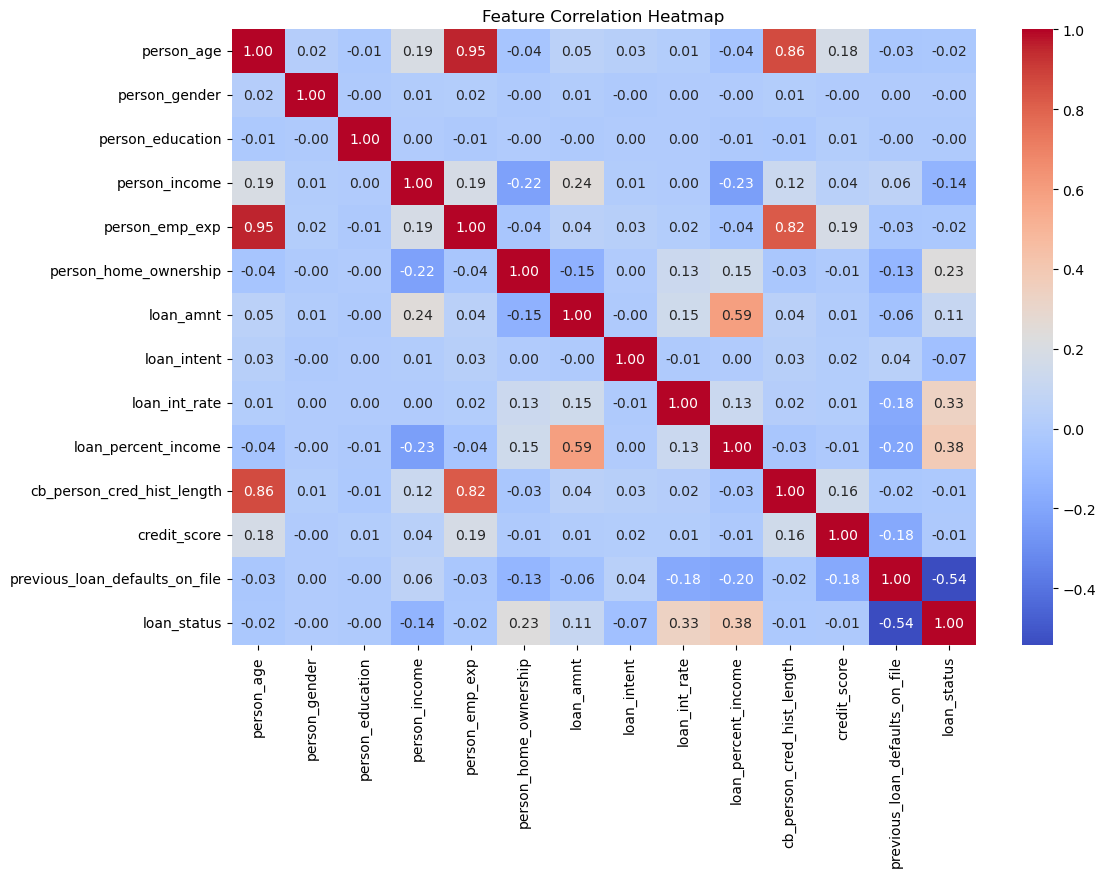

In [14]:
# 3.2 Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

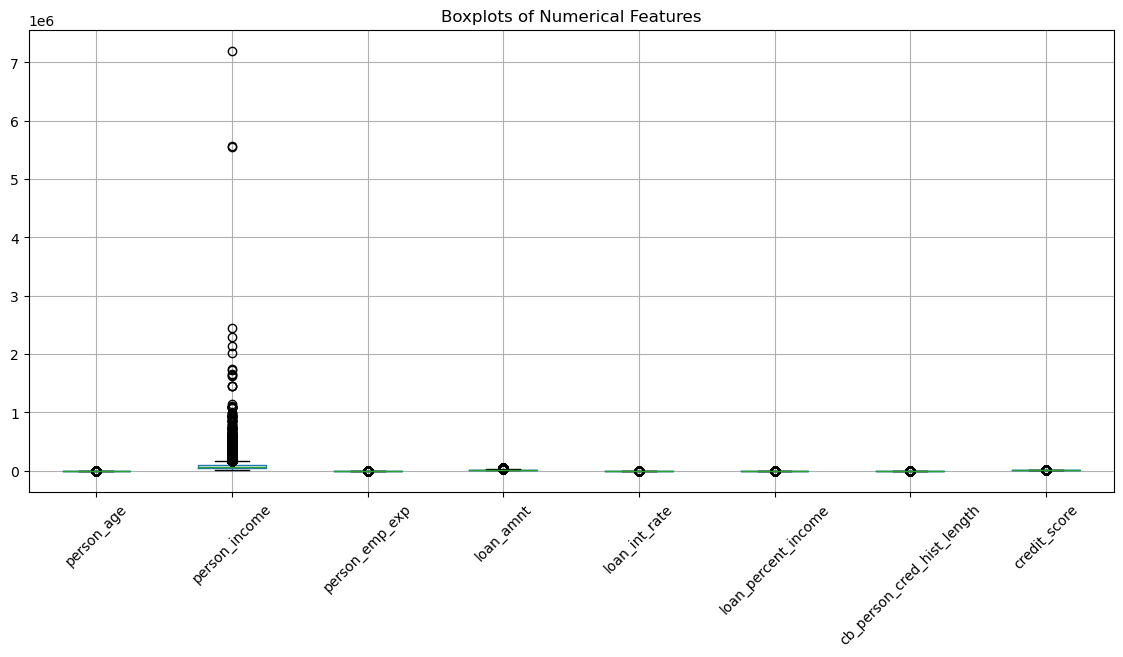

In [15]:
# 3.3 Boxplots for numerical features (detecting outliers)
numeric_cols = ["person_age", "person_income", "person_emp_exp", "loan_amnt", "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length", "credit_score"]
plt.figure(figsize=(14,6))
data[numeric_cols].boxplot(rot=45)
plt.title("Boxplots of Numerical Features")
plt.show()

<Figure size 1400x800 with 0 Axes>

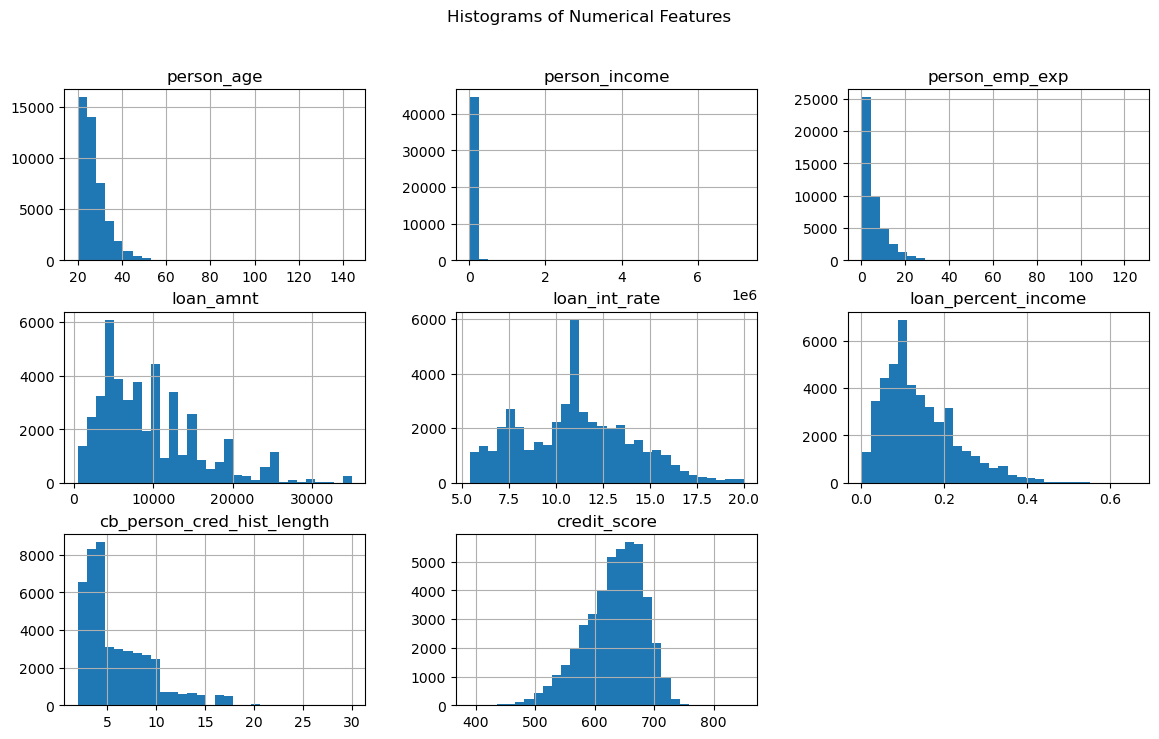

In [16]:
# 3.4 Histograms for numerical features
plt.figure(figsize=(14,8))
data[numeric_cols].hist(bins=30, figsize=(14,8), layout=(3,3))
plt.suptitle("Histograms of Numerical Features")
plt.show()


In [17]:
categorical_cols = ["person_gender", "person_education", "person_home_ownership", "loan_intent", "previous_loan_defaults_on_file"]
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
print("Categorical Encoding Completed")

Categorical Encoding Completed


In [18]:
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,0,47971.0,6,3,15000.0,3,15.66,0.31,3.0,645,0,1
44996,37.0,0,0,65800.0,17,3,9000.0,2,14.07,0.14,11.0,621,0,1
44997,33.0,1,0,56942.0,7,3,2771.0,0,10.02,0.05,10.0,668,0,1
44998,29.0,1,1,33164.0,4,3,12000.0,1,13.23,0.36,6.0,604,0,1


In [19]:
# Step 5: Feature Scaling
scaler = StandardScaler()
numeric_cols = ["person_age", "person_income", "person_emp_exp", "loan_amnt", "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length", "credit_score"]
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])
print("Feature Scaling Completed")

Feature Scaling Completed


In [20]:
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,-0.953538,0,4,-0.104090,-0.892284,3,4.024953,4,1.683039,4.016394,-0.739109,-1.419814,0,1
1,-1.118963,0,3,-0.846005,-0.892284,2,-1.359209,1,0.044782,-0.684829,-0.996863,-2.549975,1,0
2,-0.457264,0,3,-0.844065,-0.397517,0,-0.646600,3,0.625557,3.443074,-0.739109,0.047412,0,1
3,-0.788113,0,1,-0.007039,-0.892284,3,4.024953,3,1.417829,3.443074,-0.996863,0.840507,0,1
4,-0.622689,1,4,-0.176371,-0.727362,3,4.024953,3,1.095549,4.475050,-0.481354,-0.924130,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,-0.126414,1,0,-0.402231,0.097249,3,0.857799,3,1.562184,1.952442,-0.739109,0.245686,0,1
44996,1.527834,0,0,-0.180537,1.911393,3,-0.092348,2,1.028407,0.003155,1.322928,-0.230171,0,1
44997,0.866135,1,0,-0.290681,0.262171,3,-1.078758,0,-0.331212,-1.028821,1.065174,0.701716,0,1
44998,0.204436,1,1,-0.586348,-0.232595,3,0.382726,1,0.746412,2.525762,0.034155,-0.567237,0,1


In [21]:
# Step 6: Splitting Dataset
X = data.drop(columns=["loan_status"])
y = data["loan_status"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=13)
print("Data Splitting Completed")


Data Splitting Completed


In [22]:
print(x_train.shape,y_train.shape)

(30150, 13) (30150,)


In [23]:
print(x_test.shape,y_test.shape)

(14850, 13) (14850,)


In [24]:
# Step 7: Train Logistic Regression Model with Hyperparameter Tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
grid_lr = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_lr.fit(x_train, y_train)
print(f"Best Parameters for Logistic Regression: {grid_lr.best_params_}")
y_pred_lr = grid_lr.best_estimator_.predict(x_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr) * 100:.2f}%")

Best Parameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}
Logistic Regression Accuracy: 89.06%


In [25]:
# Step 8: Train RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=13)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf) * 100:.2f}%")


Random Forest Accuracy: 92.24%


In [26]:
import warnings 
warnings.filterwarnings("ignore")
# Step 9: Train XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb) * 100:.2f}%")

XGBoost Accuracy: 93.02%


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     11499
           1       0.89      0.79      0.84      3351

    accuracy                           0.93     14850
   macro avg       0.92      0.88      0.90     14850
weighted avg       0.93      0.93      0.93     14850



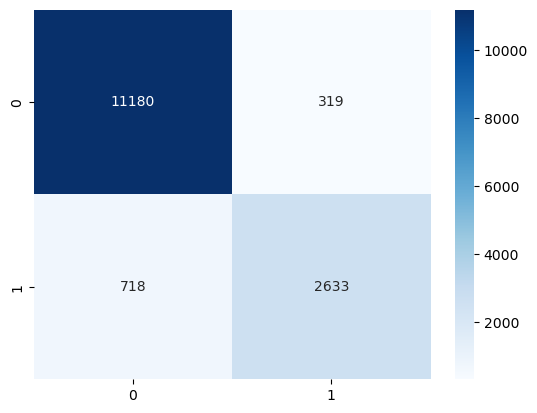

In [27]:
# Step 10: Model Evaluation
print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.show()

In [29]:
# Step 4: Save Model & Preprocessing Objects
import joblib
joblib.dump(xgb, "loan_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")
print("Model Saved Successfully")


Model Saved Successfully
